In [1]:
import numpy as np
import importlib
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/time_equilibration_Nlinker/Batch_1/"
import data_1_in
importlib.reload(data_1_in)
from data_1_in import *

In [2]:
NAMEs = ['N2','N3','N5','N20','N20b','N50']#,'N2_LE4','N5_LE4','N15_L10E4','N50_LE4']
N = [2,3,5,20,20,50]

In [3]:
NRGs = list()
for name in NAMEs:
    print(name)
    NRGs.append(Data_Treatement(media+name+'.hdf',data_type='NRG'))

N2
N3
N5
N20
N20b
N50


In [4]:
#NRGs = [Data_Treatement(media+name+'.hdf',data_type='NRG') for name in NAMEs]
for NRG in NRGs:
    #print(NRG.attributes['ell_tot'])
    #print(NRG.attributes['Nlinker'])
    #print(NRG.attributes['step_tot'])
    #print()
    #NRG.average(num_bins=NRG.attributes['step_tot']//50,log_scale=True)
    NRG.average(num_bins=100,log_scale=True)

In [11]:
for nrg in NRGs:
    print(nrg.attributes['kdiff'])

0.001
0.001
0.001
0.1
0.001


/home/hcleroy/anaconda3/lib/python3.8/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/hcleroy/anaconda3/lib/python3.8/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


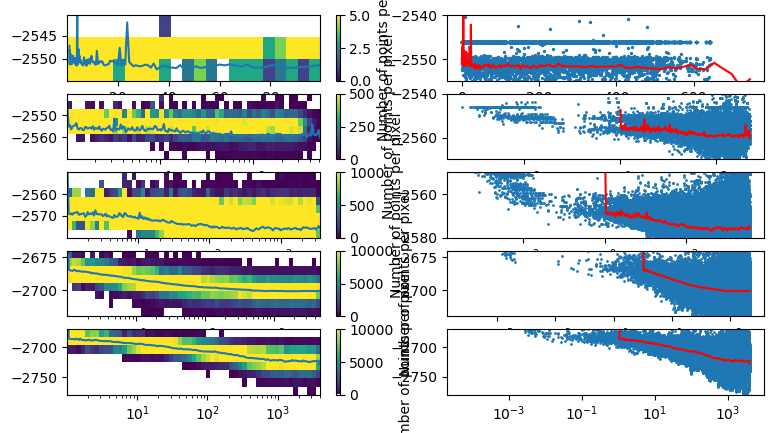

In [6]:
fig = plt.figure(figsize=(9,9))
nrows = 9
ncols = 2
ax = scatter_density(fig,NRGs[0].time[:100].astype(float).flatten(),NRGs[0].data[:100].astype(float).flatten(),nrows=nrows,ncols=ncols,pos=1,dpi=10,xlim=(0,100),ylim=(-2555,-2540),norm=True,resample=True,LogStretch=None,vmin=0,vmax=5)
ax.plot(NRGs[0].binned_time,NRGs[0].average_data)
ax = fig.add_subplot(nrows,ncols,2,projection='scatter_density')
ax.scatter(NRGs[0].time[:10].astype(float).flatten(),NRGs[0].data[:10].astype(float).flatten(),s=2.)
ax.plot(NRGs[0].binned_time,NRGs[0].average_data,color='red')
ax.set_ylim(-2555,-2540)
#XLIM=[(10**0,10**4),(10**0,10**4),(10**0,10**4),(10**0,10**4),(10**-1,10**4),(10**-1,10**4),(10**-1,10**4),(10**-1,10**4)]
#YLIM = [(-2570,-2540),(-2580,-2550),(-2720,-2670),(-3040,-2950),(-2.6*10**4,-2.53*10**4),(-2.543*10**4,-2.53*10**4),(-2.54*10**4,-2.53*10**4),(-2.57*10**4,-2.55*10**4)]
XLIM=[(10**0,10**4),(10**0,10**4),(10**0,10**4),(10**0,10**4),None]#,(10**-1,10**4)]
YLIM = [(-2570,-2540),(-2580,-2550),(-2720,-2670),(-2780,-2670),None]#,(-3040,-2950)]
VMAX = [500,1000,10000,10**4,None,None,None,None]
RESAMPLE = [True,True,True,True,False,True,True,True]
for n,nrg in enumerate(NRGs[1:]):
    X,Y = nrg.time[:100].astype(float).flatten(),nrg.data[:100].astype(float).flatten()    
    ax = scatter_density(fig,X,Y,nrows=nrows,ncols=ncols,pos=2*n+3,dpi=25,resample=RESAMPLE[n],xlim=XLIM[n],ylim=YLIM[n],vmin=0,vmax=VMAX[n],norm=True)
    ax.plot(NRGs[n+1].binned_time,NRGs[n+1].average_data)
    ax.set_xscale('log')
    ax = fig.add_subplot(nrows,ncols,2*n+4,projection='scatter_density')
    ax.set_xscale('log')
    ax.scatter(X,Y,s=1)
    ax.set_ylim(YLIM[n])
    ax.plot(NRGs[n+1].binned_time,NRGs[n+1].average_data,color='red')


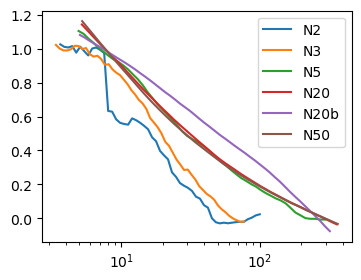

In [7]:
fig,ax = plt.subplots(ncols=1,figsize=(4,3))
i = 4
for n,NRG in enumerate(NRGs):#[i:i+1]):
    #ax[0].plot(NRG.binned_time,NRG.average_data/NRG.attributes['ell_tot'],label=NAMEs[n])
    #X,Y =NRG.binned_time,NRG.average_data
    X,Y = NRG.curate_data(10,-20,window_size=20)
    ax.plot(X,Y,label=NAMEs[n])
ax.set_xscale('log')
#ax.set_ylim(-0.1,1.1)
ax.legend()